In [26]:
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt
import globals as gl

plt.style.use('default')

In [27]:
rois = gl.rois['ROI']
H = 'L'

Text(0, 0.5, 'correlation')

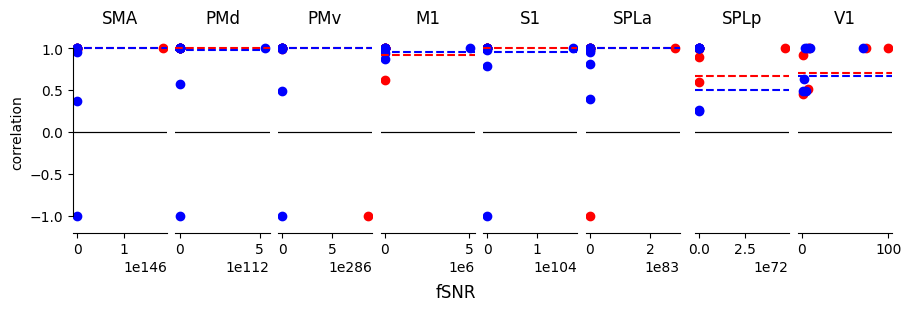

In [33]:
df_corr = pd.read_csv(os.path.join(gl.baseDir, gl.pcmDir, 'correlation_across_sessions.BOLD.tsv'), sep='\t')

fig, axs = plt.subplots(1, len(rois), sharex=False, sharey=True, figsize=(9, 3), constrained_layout=True)

corr = 'sess 3 vs. 9'
chords = ['trained', 'untrained']
ls = ['-', '--', ':']
for chord in chords:
    for r, roi in enumerate(rois):
        ax = axs[r]
        df_corr_tmp = df_corr[(df_corr['roi'] == roi) & (df_corr['Hem'] == H) & (df_corr['corr'] == corr) & (df_corr['chord'] == chord)]
        r_indiv = df_corr_tmp.r_indiv.to_numpy()
        SNR = df_corr_tmp.SNR.to_numpy()
        r_group = df_corr_tmp.r_group.to_numpy()[0]
        #ci_lo, ci_hi = df_corr_tmp.ci_lo.to_numpy()[0], df_corr_tmp.ci_hi.to_numpy()[0]
        #print(f'{roi}: r={r_group}, 95% [{ci_lo}, {ci_hi}]')
        ax.scatter(SNR, r_indiv, color='r' if chord=='trained' else 'b')
        ax.axhline(r_group, color='r' if chord=='trained' else 'b', ls='--')
        ax.axhline(0, color='k', linestyle='-', lw=.8)
        #ax.axhspan(ci_lo, ci_hi, lw=0, color='lightgrey', zorder=0)
        ax.set_ylim(-1.2, 1.2)
        ax.spines[['top', 'right', 'left']].set_visible(False)
        if r == 0:
            ax.spines[['left']].set_visible(True)
            ax.spines['left'].set_bounds(-1, 1)
        else:
            ax.tick_params(left=False)
        ax.set_title(roi)
        #ax.set_xlim(0, 100)

fig.supxlabel('fSNR')
axs[0].set_ylabel('correlation')
